In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [37]:
solarpower = pd.read_csv('data/solarpower.csv')
print(solarpower)

           date  cum_power
0    2017-01-01    20111.0
1    2017-01-02    20112.0
2    2017-01-03    20115.0
3    2017-01-04    20117.0
4    2017-01-05    20119.0
..          ...        ...
659  2018-10-22    28101.0
660  2018-10-23    28109.0
661  2018-10-24    28115.0
662  2018-10-25    28117.0
663  2018-10-26    28120.0

[664 rows x 2 columns]


In [38]:
solarpower['cum_power'].mean()

23775.573795180724

In [39]:
for i in range(solarpower.shape[0]):
    if solarpower.loc[i, 'cum_power'] == -1:
        solarpower.loc[i, 'cum_power'] = (solarpower.loc[i-1, 'cum_power']+solarpower.loc[i+1, 'cum_power'])/2  


In [40]:
solarpower['cum_power'].mean()

23848.246987951807

In [42]:
solarpower['day_power'] = solarpower['cum_power'].diff()
solarpower['date'] = pd.to_datetime(solarpower['date'])
solarpower['year_month'] = solarpower['date'].dt.to_period('M')
grouped = solarpower.groupby(['year_month']).sum()

/var/folders/x4/z3xk06l17pz4nxcm3bgt9p9m0000gp/T/ipykernel_5918/3405245100.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = solarpower.groupby(['year_month']).sum()


In [43]:
solarpower.head()

,date,cum_power,day_power,year_month
0,2017-01-01,20111.0,NaN,2017-01
1,2017-01-02,20112.0,1.0,2017-01
2,2017-01-03,20115.0,3.0,2017-01
3,2017-01-04,20117.0,2.0,2017-01
4,2017-01-05,20119.0,2.0,2017-01


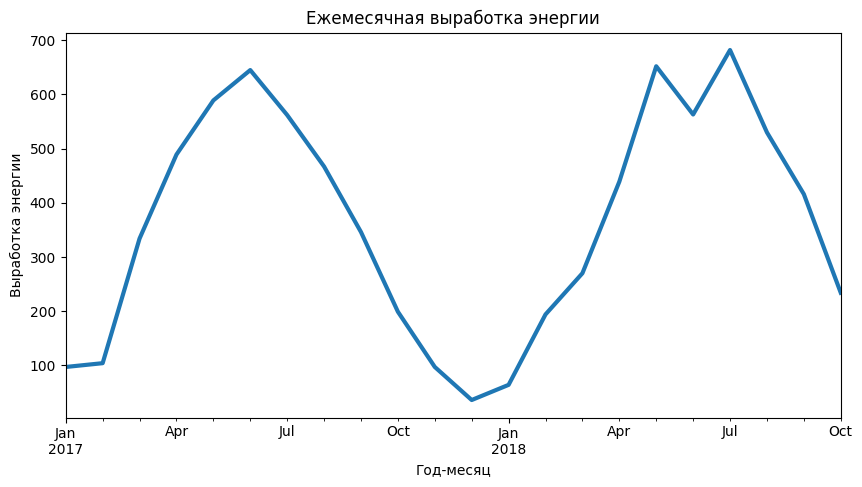

In [44]:
grouped['day_power'].plot(
    kind='line',
    lw=3, 
    title='Ежемесячная выработка энергии',
    xlabel='Год-месяц',
    ylabel='Выработка энергии',
    figsize=(10, 5)
);
